# SyriaTel Customer Churn Prediction

## BUSINESS UNDERSTANDING

### OBJECTIVES

#### Main Objective
- Find a machine learning model for correct classification of Churn and non churn customers.

#### Secondary objectives
1. To analyze customer behavior patterns and identify key factors influencing churn decisions.
2. To identify and group customers according to their churn potential and design targeted retention initiatives to reduce churn within each group.
3. To evaluate the effectiveness of retention strategies and measure the impact on customer churn rates.





## DATA UNDERSTANDING

In [2]:
# Importing pandas library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the data_understanding class from the functions script file
from functions import data_understanding as du

# Loading the "bigml.csv" file that will be used in this project
data = du("bigml.csv") 
data.first_rows() # This views the first 5 rows of the data.


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking the shape of the dataframe
data.data_shape()

(3333, 21)

In [4]:
# checking the info of the dataframe
data.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking the statistical summary of the data
data.data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The "bigml.csv" dataset has the following attributes:
 - It has 3333 rows and 21 columns
   
Here is a further explanation of the columns that we have:
1. state: The state where the customer resides.
2. account length: The number of months the customer has been with the telecommunications company.
3. area code: The area code of the customer's phone number.
4. phone number: The customer's phone number.
5. international plan: Whether the customer has an international plan.
6. voice mail plan: Whether the customer has a voicemail plan.
7. number vmail messages: The number of voicemail messages the customer has.
8. total day minutes: The total number of minutes1 used during the day.   
9. total day calls: The total number of calls made during the day.
10. total day charge: The total charge for day time usage.
11. total eve minutes: The total number of minutes used during the evening.
12. total eve calls: The total number of calls made during the evening.
13. total eve charge: The total charge for evening time usage.
14. total night minutes: The total number of minutes used during the night.
15. total night calls: The total number of calls made during the night.
16. total night charge: The total charge for night time usage.
17. total intl minutes: The total number of minutes used for international calls.
18. total intl calls: The total number of international calls made.
19. total intl charge: The total charge for international calls.
20. customer service calls: The number of calls made to customer service.
21. churn: Whether the customer has churned (left the company) or not.

We have four data types.
- Boolean, used in one column
- Integer, use in 8 columns
- Float, used in 8 columns
- object, used in 4 columns.
  
This shows that most of the columns have numerical data.

## DATA PREPARATION - Data Cleaning

In [6]:
# Importing the data_cleaning class from functions script file
from functions import data_cleaning as dc

#passing the loaded data from data_understanding class to data_cleaning class.
data_for_cleaning = data.data

cleaned_data = dc(data_for_cleaning)

In [7]:
#checking for missing values
cleaned_data.missing_values()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no columns with missing values. Therefore we don't have to worry about handling any

In [8]:
#checking for duplicates
cleaned_data.duplicates()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


There are no duplicate values in any of the 21 columns

In [9]:
cleaned_data.null_values()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
cleaned_data.outliers()

[('account length', 18),
 ('area code', 0),
 ('number vmail messages', 1),
 ('total day minutes', 25),
 ('total day calls', 23),
 ('total day charge', 25),
 ('total eve minutes', 24),
 ('total eve calls', 20),
 ('total eve charge', 24),
 ('total night minutes', 30),
 ('total night calls', 22),
 ('total night charge', 30),
 ('total intl minutes', 46),
 ('total intl calls', 78),
 ('total intl charge', 49),
 ('customer service calls', 267)]

In [11]:
cleaned_data.drop_columns(["area code", "phone number"])

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## DATA ANALYSIS - EDA

In [12]:
from functions import data_analysis as da
analysis = da(cleaned_data.data)

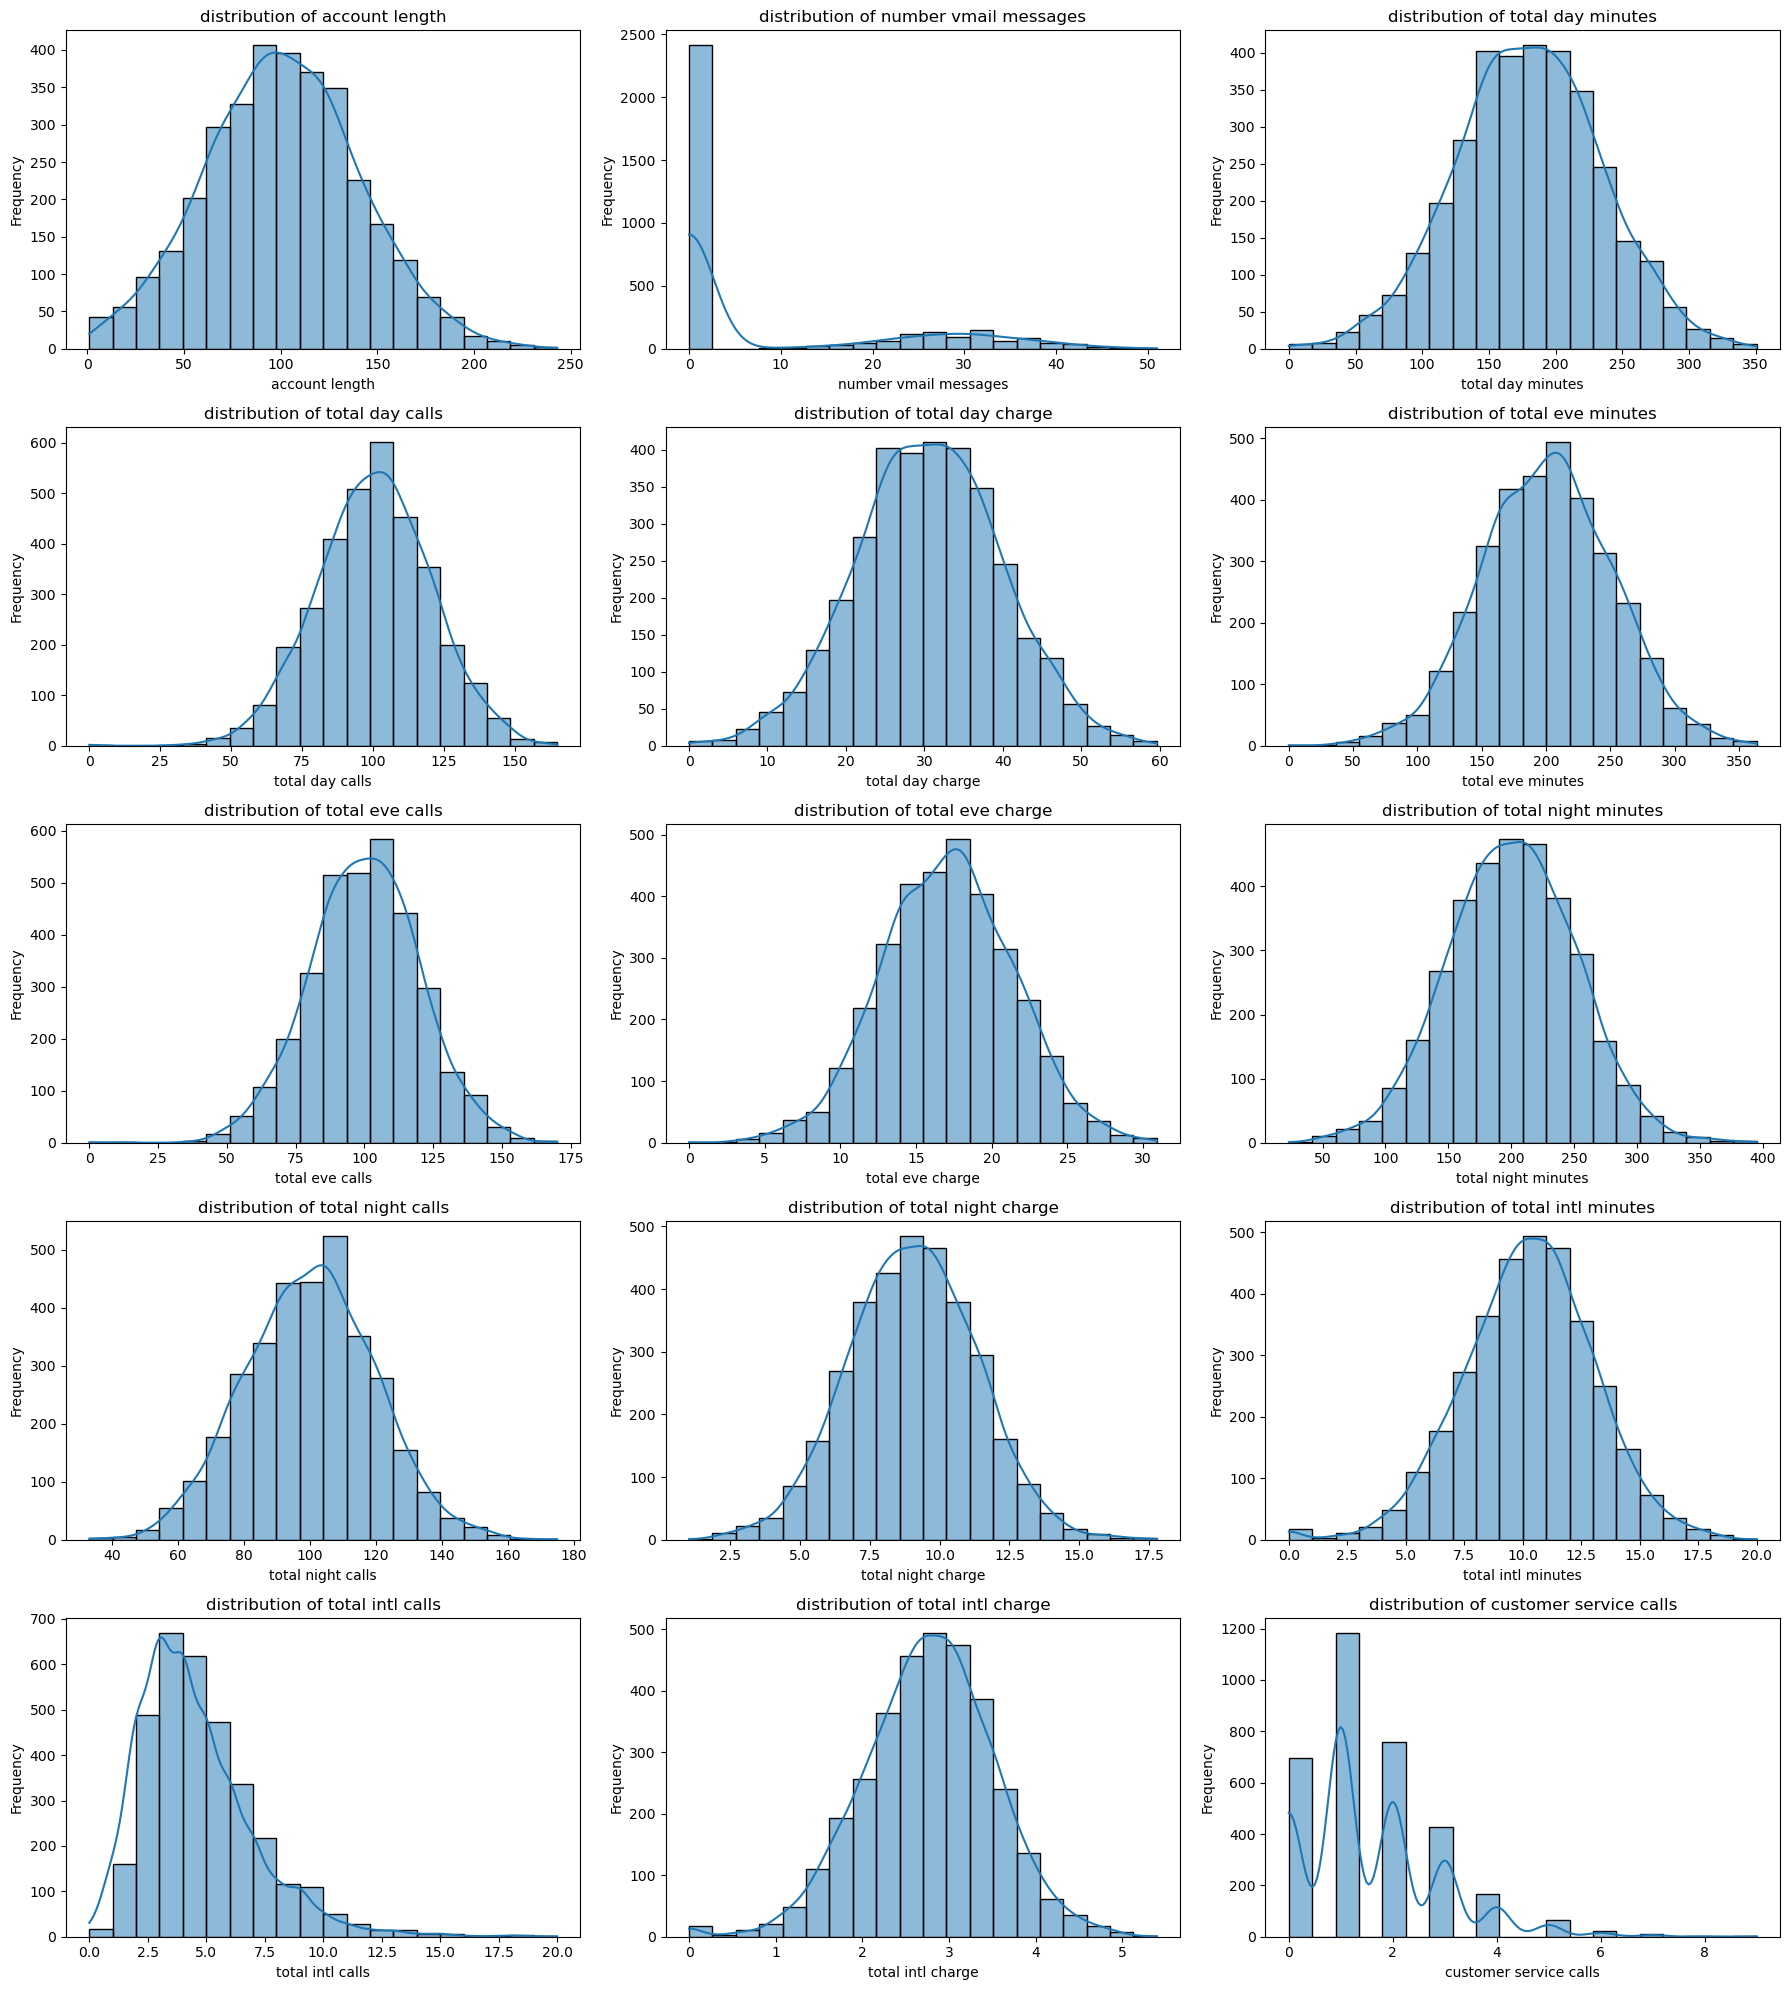

In [13]:
analysis.feature_distributions()

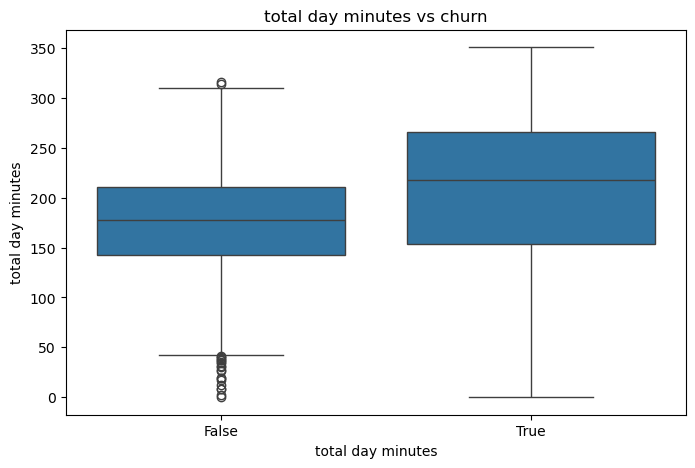

In [14]:
analysis.biv_plots(column = "total day minutes", target = "churn")

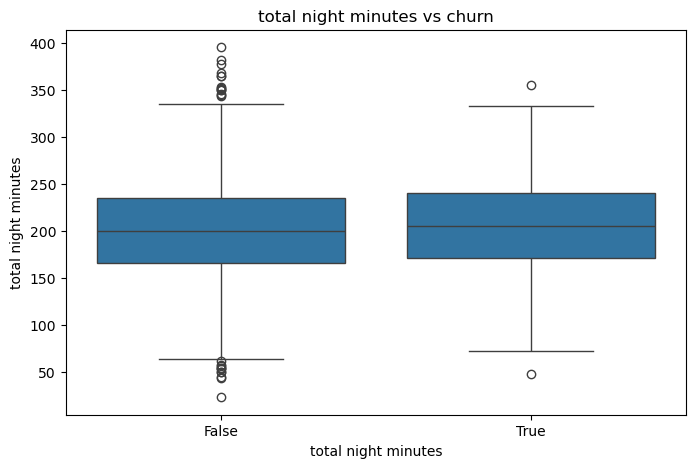

In [15]:
analysis.biv_plots(column = "total night minutes", target = "churn")

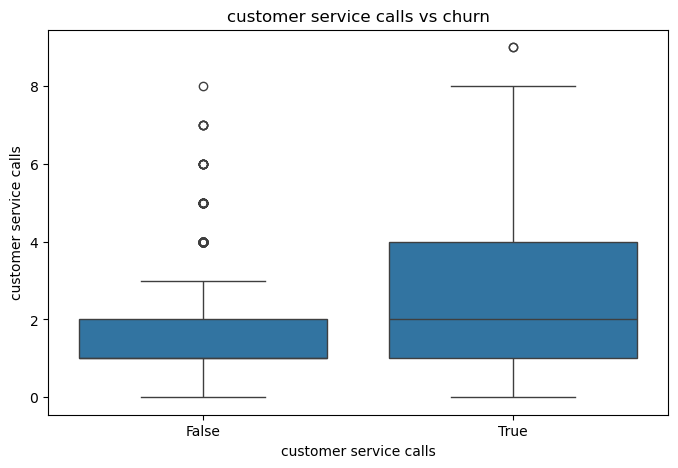

In [16]:
analysis.biv_plots(column = "customer service calls", target = "churn")

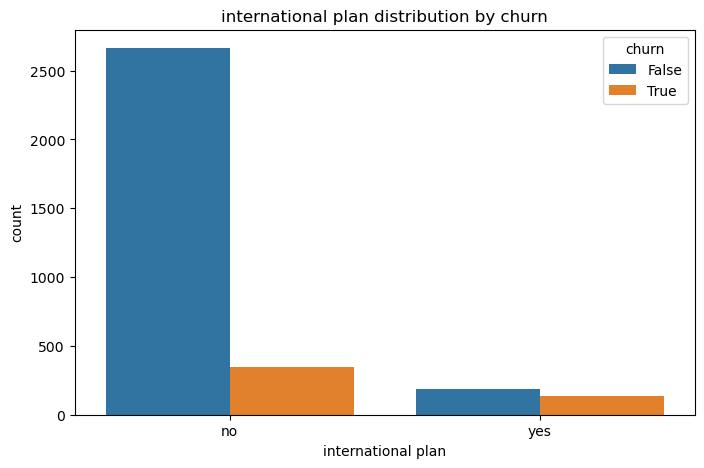

In [17]:
analysis.biv_plots(column = "international plan", target = "churn")

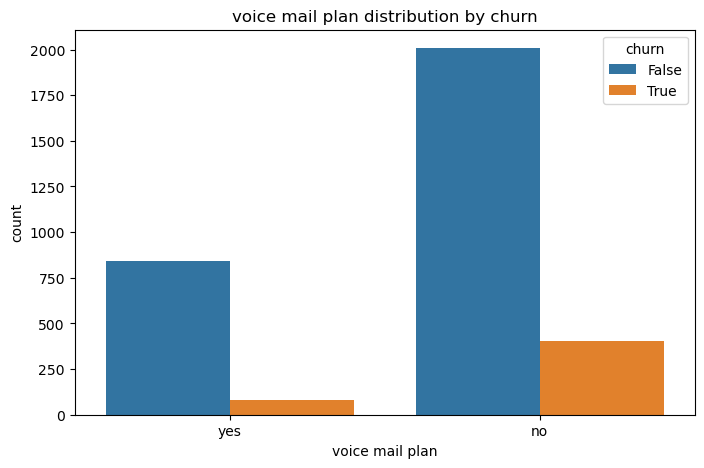

In [18]:
analysis.biv_plots(column = "voice mail plan", target = "churn")

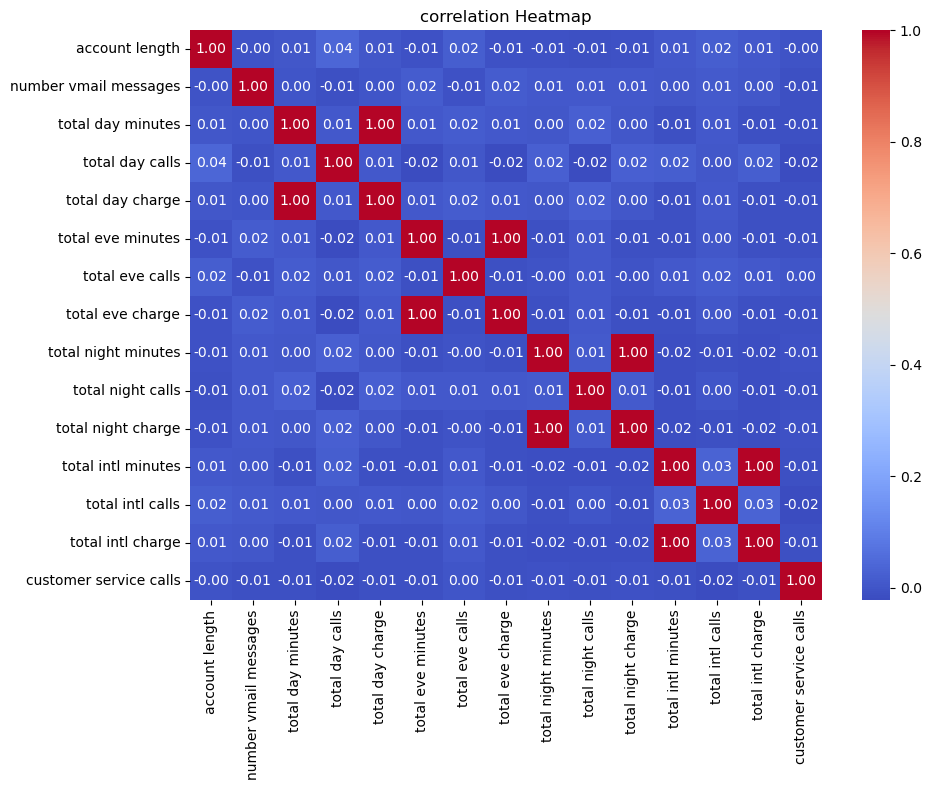

In [19]:
numeric_columns = analysis.data.select_dtypes(include=["float64", "int64"]).columns
analysis.multiv_plots(columns = numeric_columns, target = "churn")

The above plot is a plot showin correlation between the numeric columns. its shows that there is multicoleniarity wethin the dataset.
The multicollinearity is there because total day charge isequal to total day minutes, total night charge is equal to total night minutes, total international charge is equal to total international minutes.

## MODELING AND EVALUATING

### Data Preprocessing

Before modelling, I'm going to remove the multicollinearity first by dropping the minuites columns.

In [20]:
#creating a dataset (df) that i'm going to use for modelling.

df = analysis.drop_columns(["total day minutes", "total night minutes", "total intl minutes", "total eve minutes"])
df

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False
3329,WV,68,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False
3330,RI,28,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False
3331,CT,184,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False


I'm also going to drop state and account length columns because I'llnot be using them 

In [21]:
df = df.drop(columns = ["state", "account length"])


In [22]:
df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

Next, i'm going to do label encoding on the "international plan", "voice mail plan" and "churn" columns.

In [23]:
#checking for the value counts of the above columns.
print (df["international plan"].value_counts(), "\n") 
print (df["voice mail plan"].value_counts(), "\n")
print (df["churn"].value_counts())

international plan
no     3010
yes     323
Name: count, dtype: int64 

voice mail plan
no     2411
yes     922
Name: count, dtype: int64 

churn
False    2850
True      483
Name: count, dtype: int64


In [24]:
#Mapping the columns.
df["international plan"] = df["international plan"].map({"yes": 1, "no": 0})
df["voice mail plan"] = df["voice mail plan"].map({"yes": 1, "no": 0})
df["churn"] = df["churn"].map({True: 1, False: 0})

In [25]:
#confirming that the changes have been made
print (df["international plan"].value_counts(), "\n") 
print (df["voice mail plan"].value_counts(), "\n")
print (df["churn"].value_counts())

international plan
0    3010
1     323
Name: count, dtype: int64 

voice mail plan
0    2411
1     922
Name: count, dtype: int64 

churn
0    2850
1     483
Name: count, dtype: int64


### Modeling

#### Decision Trees

In [26]:
from sklearn.model_selection import train_test_split

x = df.drop("churn", axis = 1)
y = df ["churn"]

#split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)


In [45]:
#Building and training baseline model which is a simple tree with default parameters
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 42)

baseline_model = dtc.fit(x_train, y_train)
baseline_model


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [47]:
#predicting the test data
y_pred = dtc.predict(x_test)

In [48]:
#checking the AUC of my predictions

from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.8416016513312109

After building the baseline model, I will be evaluating using the metrics of success

In [49]:
#Evaluating the baseline model

print ("Baseline Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred)}")
print (f"recall: {metrics.recall_score(y_test, y_pred)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred)}")

Baseline Model Metrics:
Accuracy: 0.9175412293853074
Precision: 0.7254901960784313
recall: 0.7326732673267327
f1_score: 0.729064039408867


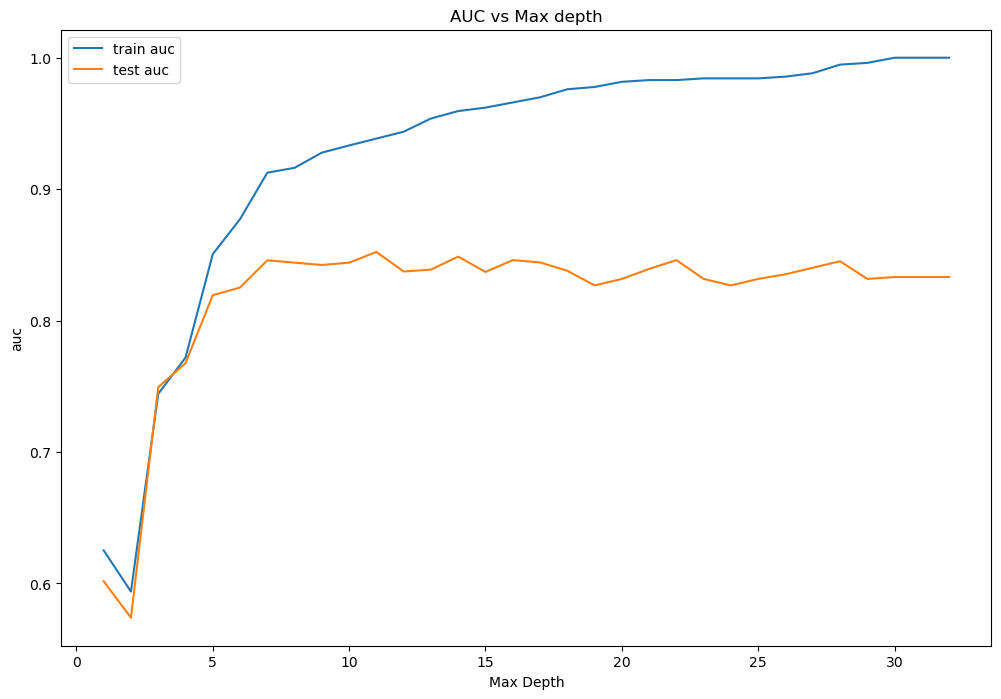

In [50]:
#identify the tree depth of our baseline model
max_depth = np.linspace (1,32,32,dtype = int)

auc_train =[]
auc_test =[]

for depth in max_depth:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 1, max_depth = depth)
    dtc.fit(x_train,y_train)
    y_test_pred = dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(max_depth,auc_train, label = "train auc")
ax.plot(max_depth,auc_test, label = "test auc")
ax.set_xlabel("Max Depth")
ax.set_ylabel("auc")
ax.set_title("AUC vs Max depth")
ax.legend();



Maximum depth - 5

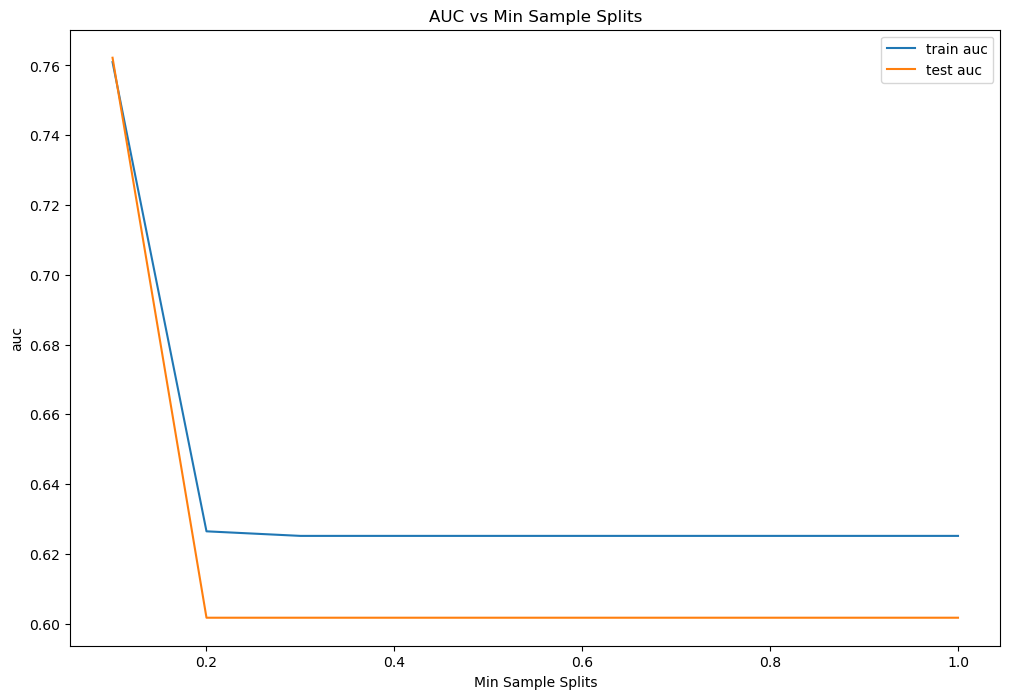

In [60]:
#checking the minimum sample splits for the decision tree
min_samples_split = np.linspace(0.1, 1, 10)


auc_train =[]
auc_test =[]

for split in min_samples_split:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 42, min_samples_split = split)
    dtc.fit(x_train,y_train)
    y_test_pred= dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)
fig, ax = plt.subplots(figsize =(12,8))

ax.plot(min_samples_split,auc_train, label = "train auc")
ax.plot(min_samples_split,auc_test, label = "test auc")
ax.set_xlabel("Min Sample Splits")
ax.set_ylabel("auc")
ax.set_title("AUC vs Min Sample Splits")
ax.legend();

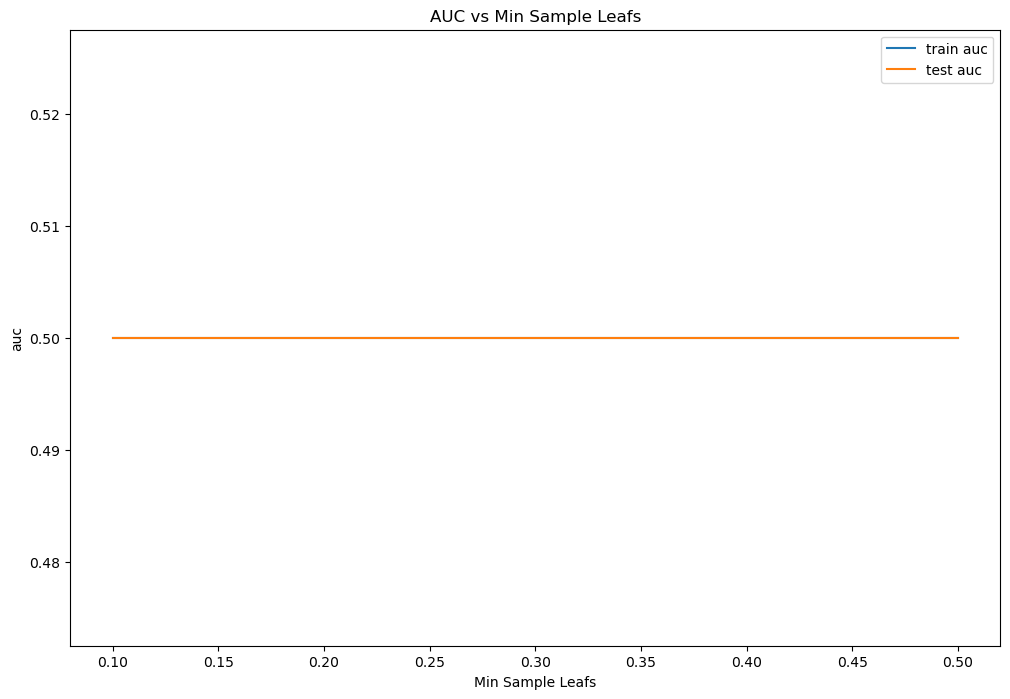

In [63]:
# Calculate minimum sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5)

auc_train =[]
auc_test =[]

for leaf in min_samples_leafs:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 42, min_samples_leaf = leaf)
    dtc.fit(x_train,y_train)
    y_test_pred = dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(min_samples_leafs,auc_train, label = "train auc")
ax.plot(min_samples_leafs,auc_test, label = "test auc")
ax.set_xlabel("Min Sample Leafs")
ax.set_ylabel("auc")
ax.set_title("AUC vs Min Sample Leafs")
ax.legend();

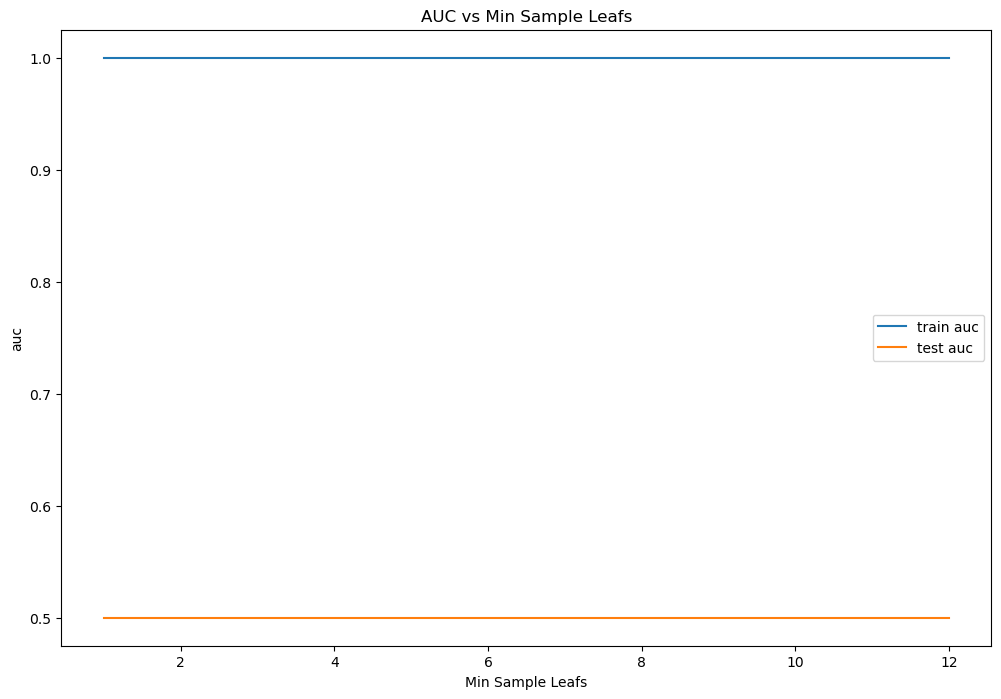

In [64]:
# Find the best value for optimal maximum feature size

max_features = np.linspace(1, 12, 12, dtype =int)

auc_train =[]
auc_test =[]

for feature in max_features:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 42, max_features = feature)
    dtc.fit(x_train,y_train)
    y__test_pred = dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(max_features,auc_train, label = "train auc")
ax.plot(max_features,auc_test, label = "test auc")
ax.set_xlabel("Min Sample Leafs")
ax.set_ylabel("auc")
ax.set_title("AUC vs Min Sample Leafs")
ax.legend();

Retraining the classifier with the chosen values.

#### Logistic Regression